<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# HW: Machine Learning in Finance 

## due 2023-02-12 ##

* Yu-Ching Liao <ycliao3@illinois.edu>

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [94]:
ds = pd.read_csv(
    "/Users/yu-chingliao/Library/CloudStorage/GoogleDrive-josephliao0127@gmail.com/My Drive/Note/UIUC/Spring_2023/IE517A_Machine Learning in Finance Lab/Lecture Notes/Week 03/HY_Universe_corporate bond.csv"
)
ds

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3.105927e+06,2000000.00,18980000.0,60000.00,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1.721697e+06,1160000.00,11197000.0,5000.00,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4.200313e+06,3520000.00,14000000.0,24000.00,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6.321560e+06,5487500.00,18459000.0,30000.00,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5.936714e+06,3305500.00,72760000.0,90000.00,9.238095,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,629377CC4,NRG,4/18/2017,1/15/2027,7/15/2021,B1,BB-,Nan,B+,6.63,...,0.376000,0.708571,1,0.243429,1.673926e+07,13167000.00,65036000.0,1475000.00,38.043478,4
2717,62940QAA3,NSGHLD,3/14/2007,12/15/2025,Nan,Ba1,BB+,Nan,BB+,7.75,...,0.024540,0.699387,5,0.460123,1.787675e+06,937286.96,12500000.0,93728.69,3.075472,1
2718,62941FAH1,VMED,7/25/2006,8/15/2016,Nan,WR,NR,BB+,NR,9.13,...,0.193798,0.527132,5,0.449612,6.440966e+06,5468000.00,18280000.0,1000000.00,8.896552,1
2719,62943WAA7,NYLD,8/5/2014,8/15/2024,Nan,Ba2,BB,Nan,BB,5.38,...,0.063197,0.605948,3,0.434944,3.923217e+06,3022500.00,16100000.0,25000.00,5.847826,1


# Print the shape out. 

In [95]:
labels = list(ds.columns)
n_column = len(labels)
n_row = len(ds)

print("The number of Columns is", n_column, ".")
print("The number of Rows is", n_row, ".")

The number of Columns is 37 .
The number of Rows is 2721 .


# Print the nature out

In [96]:
nl = []
sl = []
ol = []

for label in labels:
    Number = 0
    String = 0
    Other = 0

    for i in ds[label]:
        if type(i) == str:
            String += 1
        elif (type(i) == int) or (type(i) == float):
            Number += 1
        else:
            Other += 1
    nl.append(Number)
    sl.append(String)
    ol.append(Other)

Output = {
    "Label": labels,
    "Number": nl,
    "String": sl,
    "Other": ol
}
Output = pd.DataFrame(Output)
Output

,Label,Number,String,Other
0,CUSIP,0,2721,0
1,Ticker,0,2721,0
2,Issue Date,0,2721,0
3,Maturity,0,2721,0
4,1st Call Date,0,2721,0
5,Moodys,0,2721,0
6,S_and_P,0,2721,0
7,Fitch,0,2721,0
8,Bloomberg Composite Rating,0,2721,0
9,Coupon,2721,0,0


# Summary of Statistics
I pick column #9: Coupon as the example numerical data , and #12: Coupon Type as catagorical data. 

In [118]:
numer = np.array(ds['Coupon'])

#Mean, Var and Std
print('μ =', numer.mean(), 'Var =', numer.var(), "σ =", numer.std(),'\n')

#quantiles
def q(ds, n_q):
    result = []
    for i in range(n_q+1):
        result.append(np.percentile(ds, i*(100)/n_q))
    return result
print("Boundaries for 4 Equal Percentiles\n",q(numer, 4), "\n")

#10 equal percenetiles
print("Boundaries for 10 Equal Percentiles\n",q(numer, 10), "\n")

#catagorical analysis
cat = list(ds['Coupon Type'])
neat_cat = list(set(cat))
print("Unique Label Values \n", neat_cat)

#count catagorics 
counts = []
for i in neat_cat:
    counts.append(sum(ds['Coupon Type'] == i))
Output = {
    "Types" : neat_cat,
    "Counts" : counts
}
Output = pd.DataFrame(Output)
Output = Output.set_index("Types")
Output

μ = 10.30787210584344 Var = 3974.0157451596806 σ = 63.0397949327223 

Boundaries for 4 Equal Percentiles
 [0.0, 5.0, 6.25, 7.75, 999.0] 

Boundaries for 10 Equal Percentiles
 [0.0, 2.95, 4.63, 5.25, 5.75, 6.25, 6.83, 7.5, 8.13, 9.38, 999.0] 

Unique Label Values 
 ['FIXED', 'STEP CPN', 'DEFAULTED', 'EXCHANGED', 'VARIABLE', 'FUNGED', 'FLOATING', 'FLAT TRADING', 'PAY-IN-KIND', 'ZERO COUPON']


,Counts
Types,
FIXED,2139
STEP CPN,4
DEFAULTED,184
EXCHANGED,102
VARIABLE,111
FUNGED,2
FLOATING,124
FLAT TRADING,7
PAY-IN-KIND,41


# QQ Plot

In [119]:
import pylab
import scipy.stats as stats

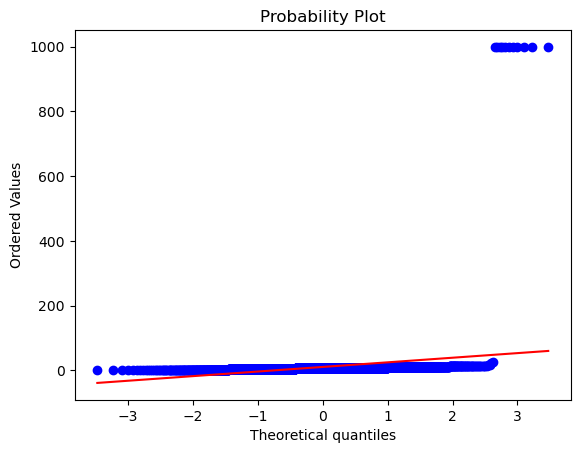

In [121]:
stats.probplot(numer, dist="norm", plot=pylab)
pylab.show()

There are some extremely value though rest are quite "normal". 

# Print Summary of data

In [124]:
summary = ds.describe()
print(summary)

            Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4.193546e+05   
min     

# Plot out data

In [147]:
def legend(pos="bottom",ncol=3):
    if pos=="bottom":
        plt.legend(bbox_to_anchor=(0.5,-0.2), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)
        

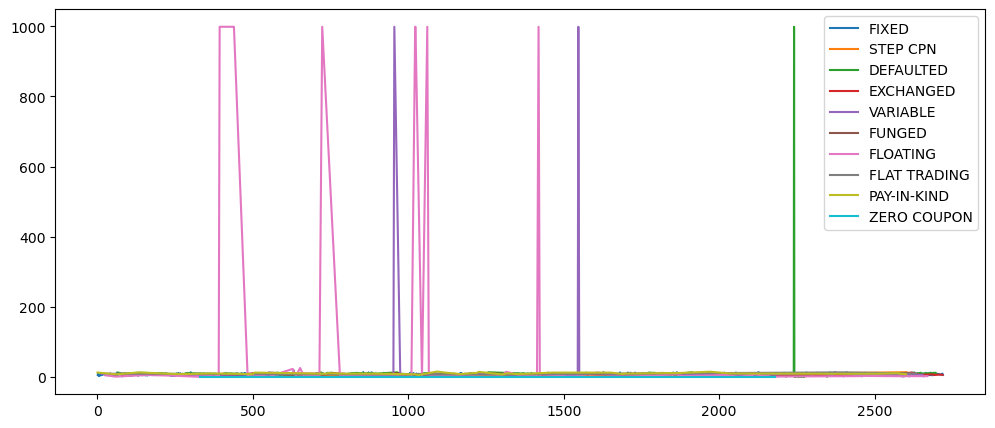

In [155]:
plt.figure(figsize=[12,5])
for i in neat_cat:
    plt.plot(ds['Coupon'].loc[ds['Coupon Type']==i], label = i)
plt.legend()
plt.show()

Since this plot is extremely useless, instead I plot below so that we can see the coupon we can get on different coupon types. 

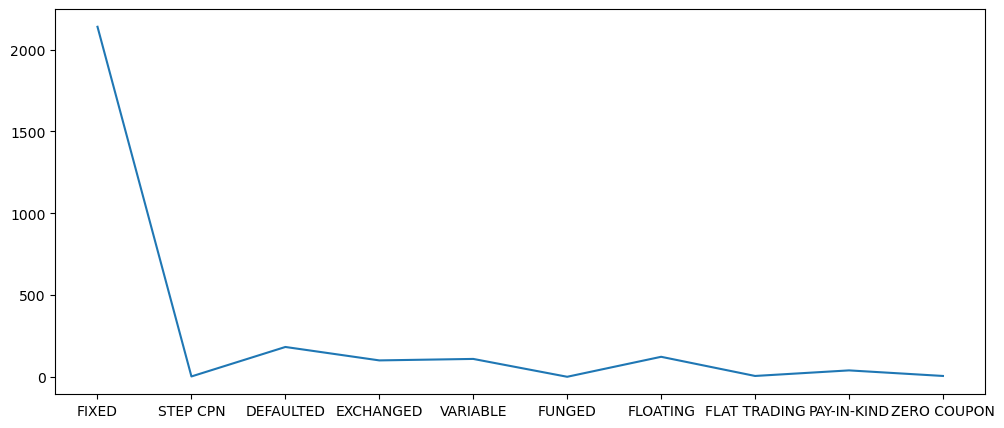

In [156]:
plt.figure(figsize=[12, 5])
plt.plot(Output)
plt.show()

# Cross Plotting Pairs of Attributes (Scatter Plot)
I use 'weekly_mean_volume' to cross plot with 'weekly_median_volume'. 

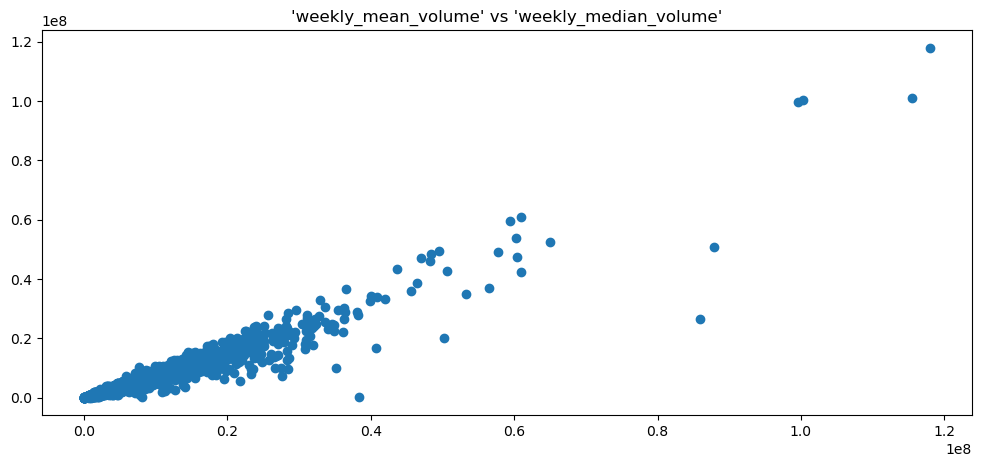

In [170]:
plt.figure(figsize=[12,5])
plt.scatter(ds['weekly_mean_volume'], ds['weekly_median_volume'])
plt.title("'weekly_mean_volume' vs 'weekly_median_volume'")
plt.show()

It is somewhat positively correlated, but not strict enough. 

# Target vs Real Attributes
I plot coupon against coupon types

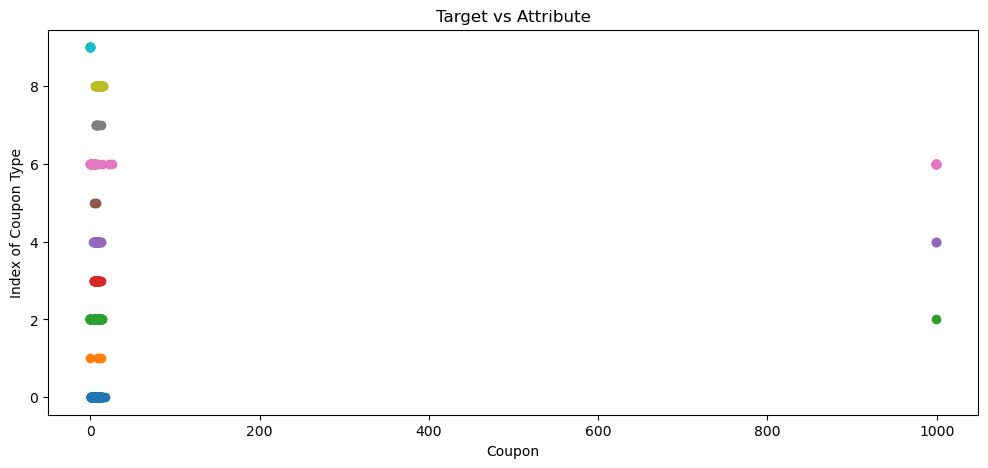

In [181]:
plt.figure(figsize=[12,5])
for i in range(len(neat_cat)):
    plt.scatter(ds['Coupon'].loc[ds['Coupon Type'] == neat_cat[i]],
                i* np.ones_like(ds['Coupon'].loc[ds['Coupon Type'] == neat_cat[i]]))
plt.ylabel("Index of Coupon Type")
plt.xlabel("Coupon")
plt.title("Target vs Attribute")
plt.show()

# Correlations

In [192]:
ds.corr()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
Coupon,1.000000,-0.014238,0.098844,-0.042302,-0.042302,-0.023330,-0.026717,0.044601,0.026891,-0.028336,...,-0.014316,-0.045897,0.051856,0.029125,-0.027724,-0.028584,-0.026362,-0.014438,-0.028045,-0.018326
Issued Amount,-0.014238,1.000000,0.008601,0.134930,0.134930,0.156948,0.326310,0.062343,0.078362,0.068113,...,0.052617,-0.112369,-0.070714,-0.049513,0.382050,0.396947,0.261469,0.105208,0.274420,0.188765
Maturity At Issue months,0.098844,0.008601,1.000000,0.072507,0.072507,0.038839,-0.015227,-0.115086,-0.138581,0.029530,...,0.104127,0.100168,0.102990,-0.040186,-0.023002,-0.032868,-0.017137,-0.020392,0.036729,0.006573
LiquidityScore,-0.042302,0.134930,0.072507,1.000000,1.000000,0.803139,0.786718,-0.627008,-0.656980,0.873040,...,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.025707,0.673569,0.239951
LIQ SCORE,-0.042302,0.134930,0.072507,1.000000,1.000000,0.803139,0.786718,-0.627008,-0.656980,0.873040,...,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.025707,0.673569,0.239951
n_trades,-0.023330,0.156948,0.038839,0.803139,0.803139,1.000000,0.769322,-0.425801,-0.468673,0.704310,...,0.415695,0.396880,-0.208283,-0.348408,0.309053,0.285998,0.432955,-0.041335,0.804753,0.234165
volume_trades,-0.026717,0.326310,-0.015227,0.786718,0.786718,0.769322,1.000000,-0.276204,-0.278564,0.772564,...,0.387555,0.241814,-0.452584,-0.327922,0.503159,0.479018,0.616802,-0.037198,0.602055,0.144272
total_median_size,0.044601,0.062343,-0.115086,-0.627008,-0.627008,-0.425801,-0.276204,1.000000,0.930213,-0.490428,...,-0.650101,-0.826443,0.081332,0.486900,0.060608,0.053381,-0.066253,0.138658,-0.378970,-0.096283
total_mean_size,0.026891,0.078362,-0.138581,-0.656980,-0.656980,-0.468673,-0.278564,0.930213,1.000000,-0.494483,...,-0.679317,-0.862401,0.086759,0.502385,0.052018,0.054723,-0.087748,0.177104,-0.428501,-0.100327
n_days_trade,-0.028336,0.068113,0.029530,0.873040,0.873040,0.704310,0.772564,-0.490428,-0.494483,1.000000,...,0.500944,0.433119,-0.444068,-0.406258,0.168114,0.169430,0.323094,-0.118874,0.416313,0.026527


n_trade and liquidity seemed to be positively correlated, and LIQ and liquidity is duplicating so redundant. 

# Correlation Visualization

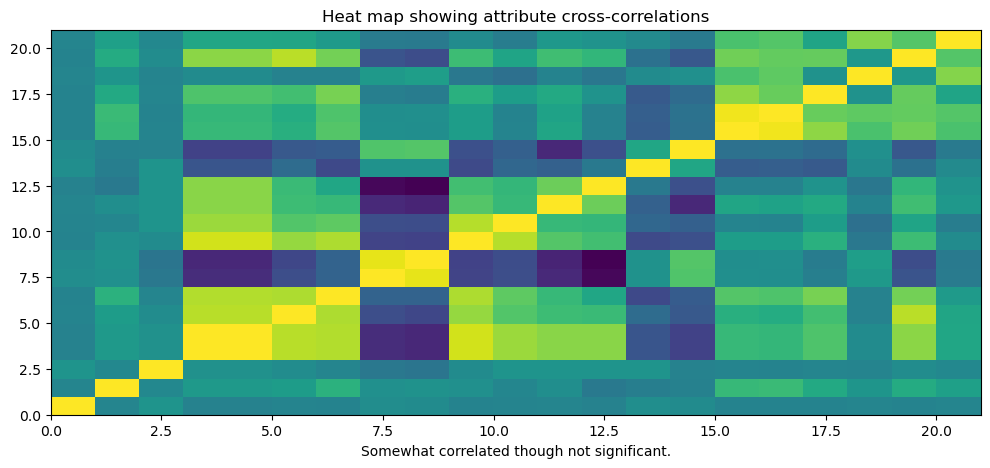

In [188]:
#calculate correlations between real-valued attributes
corMat = pd.DataFrame(ds.corr())
#visualize correlations using heatmap
plt.figure(figsize=[12,5])
plt.title("Heat map showing attribute cross‐correlations")
plt.pcolor(corMat)
plt.xlabel('Somewhat correlated though not significant.')
plt.show()